# SQL Task 

In [1]:
# Importing the required libraries

import sqlite3
import pandas as pd

In [2]:
# Read the code below and write your observation in the next cell

conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
print(cursor.fetchall())

cursor.execute("PRAGMA table_info('Salaries')")
cols = cursor.fetchall()
for col in cols:
    print(col[1])

[('Salaries',)]
Id
EmployeeName
JobTitle
BasePay
OvertimePay
OtherPay
Benefits
TotalPay
TotalPayBenefits
Year
Notes
Agency
Status


### Read the code above. Write observations here, i.e. what the code is trying to do..
.
.

In [3]:
# Reading the data from database and storing it in the dataframe

df = pd.read_sql_query("""SELECT * FROM Salaries""", conn)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


## Q_sample: Who is getting the maximum salary?

In [4]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT MAX(TotalPay) FROM Salaries""", conn)
output

,MAX(TotalPay)
0,567595.43


In [5]:
# Pandas Implementation - 1

max(df.TotalPay)

567595.43

In [6]:
# Pandas Implementation - 2
# Syntax - dataframe.loc[row, index]

df.loc[df.TotalPay == max(df.TotalPay), ['TotalPay']]

,TotalPay
0,567595.43


<h3>
If you observe the above output, it is giving the maximum salary. 

Inorder to understand who is getting the maximum salary look at the next cell. 

Also try to map Pandas .loc syntax with the SQL SELECT Query.
</h3>

In [7]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT * 
                            FROM Salaries 
                            WHERE TotalPay = (SELECT MAX(TotalPay) FROM Salaries)""", conn)
output

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,


In [8]:
# Pandas Implementation

df.loc[df.TotalPay == max(df.TotalPay)]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,


### Q1.Retrieve the top 8 rows from the table.

In [9]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT * FROM Salaries LIMIT 8""",conn)
output

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.00,8601.00,189082.74,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.00,51322.50,,307899.46,307899.46,2011,,San Francisco,


In [10]:
# Python implementation
df.head(8)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,,316285.74,316285.74,2011,,San Francisco,
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,,315981.05,315981.05,2011,,San Francisco,
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,,307899.46,307899.46,2011,,San Francisco,


### Q2.What is the average TotalPay?

In [11]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT AVG(TotalPay)  FROM Salaries """,conn)
output

,AVG(TotalPay)
0,74768.321972


In [12]:
df['TotalPay'].mean()

74768.321971703

### Q3.What is the highest amount of BasePay in the dataset?

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148654 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            148654 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               148654 non-null object
Agency              148654 non-null object
Status              148654 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 14.7+ MB


In [14]:
df['BasePay'].unique()

array([167411.18, 155966.02, 212739.13, ..., 6.04, 15.5, 'Not Provided'],
      dtype=object)

In [15]:
import numpy as np

In [16]:
df['BasePay']= df['BasePay'].replace('Not Provided',np.nan)

In [17]:
df['BasePay'].unique()

array([167411.18, 155966.02, 212739.13, ..., 6.04, 15.5, nan],
      dtype=object)

In [18]:
df['BasePay'] = pd.to_numeric(df['BasePay'])

In [19]:
max(df.BasePay)

319275.01

In [20]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT MAX(BasePay) FROM Salaries WHERE BasePay !='Not Provided' AND BasePay != ''""",conn)
output

,MAX(BasePay)
0,319275.01


### Q4.What is the Job title of 'NATHANIEL FORD'?

In [21]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT JobTitle FROM Salaries WHERE EmployeeName="NATHANIEL FORD" """,conn)
output

,JobTitle
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY


In [22]:
df['JobTitle'][df["EmployeeName"]=="NATHANIEL FORD"]

0    GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
Name: JobTitle, dtype: object

### Q5.How much 'TotalPayBenefits' is made by 'NATHANIEL FORD'?

In [23]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT TotalPayBenefits FROM Salaries WHERE EmployeeName="NATHANIEL FORD" """,conn)
output

,TotalPayBenefits
0,567595.43


In [24]:
df['TotalPayBenefits'][df["EmployeeName"]=="NATHANIEL FORD"]

0    567595.43
Name: TotalPayBenefits, dtype: float64

### Q.6. What was the average (mean) TotalPay of all employees per year? (Output for each year from 2011 to 2014 separately)


In [25]:
output=pd.read_sql_query("""SELECT AVG(TotalPay) FROM Salaries WHERE Year = 2011 """, conn)
output

,AVG(TotalPay)
0,71744.103871


In [26]:
output=pd.read_sql_query("""SELECT AVG(TotalPay) FROM Salaries WHERE Year = 2012 """, conn)
output

,AVG(TotalPay)
0,74113.262265


In [27]:
output=pd.read_sql_query("""SELECT AVG(TotalPay) FROM Salaries WHERE Year = 2013 """, conn)
output

,AVG(TotalPay)
0,77611.443142


In [28]:
output=pd.read_sql_query("""SELECT AVG(TotalPay) FROM Salaries WHERE Year = 2014 """, conn)
output

,AVG(TotalPay)
0,75463.91814


### Q7.How many unique jobs are there?

In [29]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT COUNT(DISTINCT JobTitle )FROM Salaries""",conn)
output

,COUNT(DISTINCT JobTitle )
0,2159


In [30]:
df['JobTitle'].nunique()

2159

### Q8.What are the top 5 most common jobs?

In [31]:
# SQLite Implementation

output =pd.read_sql_query('''SELECT JobTitle, COUNT(JobTitle) AS value_occurrence FROM Salaries GROUP BY `JobTitle`
   ORDER BY `value_occurrence` DESC
   LIMIT    5''',conn)
output

,JobTitle,value_occurrence
0,Transit Operator,7036
1,Special Nurse,4389
2,Registered Nurse,3736
3,Public Svc Aide-Public Works,2518
4,Police Officer 3,2421


In [32]:
df['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

### Q9.How many people have the word Chief in their job title?

In [33]:
# SQLite Implementation

output = pd.read_sql_query("""SELECT COUNT(JobTitle) FROM Salaries WHERE JobTitle LIKE '%CHIEF%' """,conn)
output

,COUNT(JobTitle)
0,627


## EDA

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [35]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737,182235,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,NaN,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,NaN,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,NaN,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            148654 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               148654 non-null object
Agency              148654 non-null object
Status              148654 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [37]:
df.isnull().sum()

Id                    0
EmployeeName          0
JobTitle              0
BasePay             609
OvertimePay           0
OtherPay              0
Benefits              0
TotalPay              0
TotalPayBenefits      0
Year                  0
Notes                 0
Agency                0
Status                0
dtype: int64

### Observations
* In BasePay we have 609 missing values

In [38]:
(df.isnull().sum()/len(df))*100

Id                  0.000000
EmployeeName        0.000000
JobTitle            0.000000
BasePay             0.409676
OvertimePay         0.000000
OtherPay            0.000000
Benefits            0.000000
TotalPay            0.000000
TotalPayBenefits    0.000000
Year                0.000000
Notes               0.000000
Agency              0.000000
Status              0.000000
dtype: float64

### Removing Missing values

In [39]:
df1=df[~df['BasePay'].isnull()]

In [40]:
df1.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64

In [41]:
df1[df1.duplicated()].count()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Notes               0
Agency              0
Status              0
dtype: int64

* There is no duplicate values in the rows

In [42]:
df1['OvertimePay'].unique()

array([0, 245131.88, 106088.18, ..., 228, 102.7, 56.77], dtype=object)

In [43]:
df1[df1['OvertimePay']=='Not Provided']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


In [44]:
df1.replace(['Not Provided',""],np.nan,inplace=True)

In [45]:
df1['OvertimePay'].unique()

array([0.0000000e+00, 2.4513188e+05, 1.0608818e+05, ..., 2.2800000e+02,
       1.0270000e+02, 5.6770000e+01])

In [46]:
df1.isnull().sum()

Id                       0
EmployeeName             2
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148045
Agency                   0
Status              109926
dtype: int64

In [47]:
round((df1.isnull().sum()/len(df1))*100,3)

Id                    0.000
EmployeeName          0.001
JobTitle              0.000
BasePay               0.000
OvertimePay           0.000
OtherPay              0.000
Benefits             24.424
TotalPay              0.000
TotalPayBenefits      0.000
Year                  0.000
Notes               100.000
Agency                0.000
Status               74.252
dtype: float64

In [48]:
df1.drop('Notes',axis=1,inplace=True)

In [49]:
df1.drop('Status',axis=1,inplace=True)

* We dropping both 'Notes' and 'Status' columns from the dataset

In [50]:
df1.isnull().sum()

Id                      0
EmployeeName            2
JobTitle                0
BasePay                 0
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [51]:
df1

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco


In [52]:
df1=df1[~df1['EmployeeName'].isnull()]

In [53]:
df1['Benefits'].value_counts()

0.00        1596
4659.36      107
25699.20      83
37055.22      82
27052.98      75
            ... 
2908.56        1
10167.81       1
3352.12        1
327.63         1
309.74         1
Name: Benefits, Length: 98362, dtype: int64

In [54]:
df1['Benefits']= df1['Benefits'].replace("",np.nan)

* In benefits we have missing value,The most of the missing values are 'spaces'(empty).so using replace function we replace the spaces with NAN .

In [55]:
df1['Benefits'].value_counts(dropna=False)

NaN         36158
0.00         1596
4659.36       107
25699.20       83
37055.22       82
            ...  
2908.56         1
10167.81        1
3352.12         1
327.63          1
309.74          1
Name: Benefits, Length: 98363, dtype: int64

In [56]:
df1['BasePay'].fillna(df1['BasePay'].median(),inplace=True)

In [57]:
df1['Benefits'].value_counts(dropna=False)

NaN         36158
0.00         1596
4659.36       107
25699.20       83
37055.22       82
            ...  
2908.56         1
10167.81        1
3352.12         1
327.63          1
309.74          1
Name: Benefits, Length: 98363, dtype: int64

In [58]:
df1.select_dtypes(exclude='object').columns

Index(['Id', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'TotalPayBenefits', 'Year'],
      dtype='object')

In [59]:
df1.shape

(148043, 11)

In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148043 entries, 0 to 148653
Data columns (total 11 columns):
Id                  148043 non-null int64
EmployeeName        148043 non-null object
JobTitle            148043 non-null object
BasePay             148043 non-null float64
OvertimePay         148043 non-null float64
OtherPay            148043 non-null float64
Benefits            111885 non-null float64
TotalPay            148043 non-null float64
TotalPayBenefits    148043 non-null float64
Year                148043 non-null int64
Agency              148043 non-null object
dtypes: float64(6), int64(2), object(3)
memory usage: 13.6+ MB


### Outliers Treatment

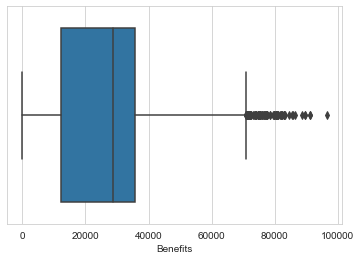

In [61]:
sns.boxplot(df1['Benefits'])

In [62]:
Q1=df1['Benefits'].quantile(0.25)
Q3=df1['Benefits'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1- 1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

12142.51
35608.28
23465.769999999997
-23056.144999999997 70806.935


In [63]:
df1=df1[df1["Benefits"]< Upper_Whisker]

In [64]:
df1.shape

(111796, 11)

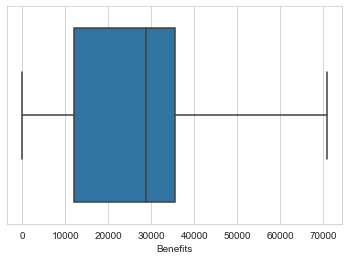

In [65]:
sns.boxplot(x='Benefits',data=df1)

In [66]:
df1.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

### Observations
* In Benefits we found 36158 missing values.
* Using IQR Method we treated the outliers.
* Near 30,000 Outliers found in IQR method.we removed that outliers.
* Now Lower_whisker :12142.51
* The upper_whisker :608.28

In [68]:
df1['Agency'].unique()

array(['San Francisco'], dtype=object)

In [70]:
df1.drop(labels='Agency',axis=1,inplace=True)

* Agency attribute have single value for entier rows so that will be dropped

In [71]:
df1 = df1[~df['BasePay'].isnull()]
df1 = df1[~df['EmployeeName'].isnull()]

In [72]:
round((df1.isnull().sum()/len(df1))*100,3)

Id                  0.0
EmployeeName        0.0
JobTitle            0.0
BasePay             0.0
OvertimePay         0.0
OtherPay            0.0
Benefits            0.0
TotalPay            0.0
TotalPayBenefits    0.0
Year                0.0
dtype: float64

In [73]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes                object
Status               object
dtype: object

* BasePay,OvertimePay,OtherPay,Benefits These attributes are basically numerical values but showing like object.

In [74]:
df1['BasePay'] = pd.to_numeric(df1['BasePay'])
df1['OvertimePay'] = pd.to_numeric(df1['OvertimePay'])
df1['OtherPay'] = pd.to_numeric(df1['OtherPay'])
df1['Benefits'] = pd.to_numeric(df1['Benefits'])

In [75]:
df1.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

### Univariate Analysis

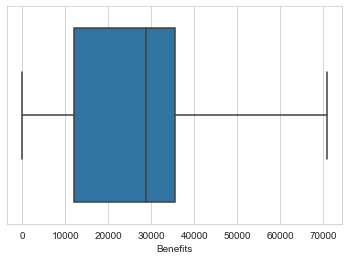

In [76]:
sns.boxplot(df1['Benefits'])

In [77]:
df1['Benefits'].median()

28689.26

In [78]:
df1['Benefits'].fillna(df1['Benefits'].median(),inplace=True)

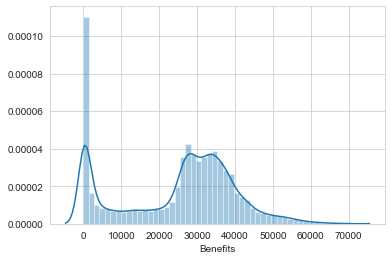

In [79]:
sns.distplot(df1['Benefits'])
plt.show()

* Plot after replacing nan values.

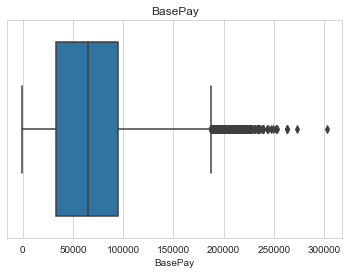

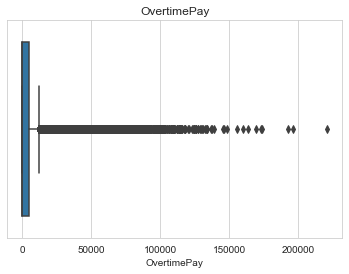

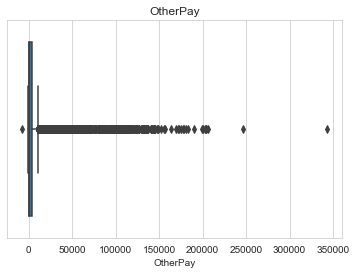

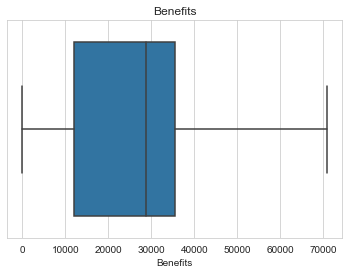

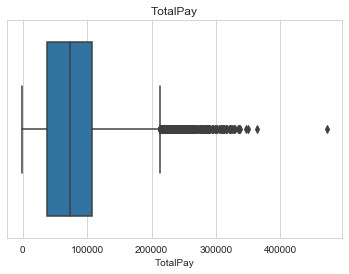

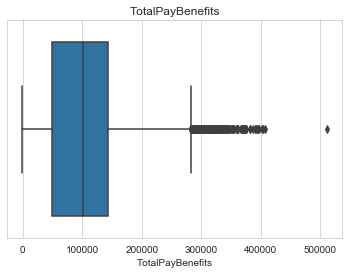

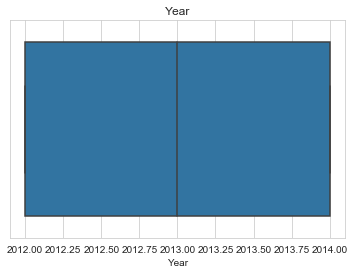

In [80]:
for col in df1.select_dtypes(exclude='object').columns[1:]:
    sns.boxplot(x=col,data=df1)
    plt.title(col)
    plt.show()

- Base Pay:
    - Base pay has extreem values
- Overtime Pay:
    - most of the values present nearer to zero.
    
- Other Pay:
    - Most of the values in other pay have at zero.

- Benefits:
    - Benefits have extreem values at both sides. 
    
- Total Pay:
    - Total pay have extreem values to the right side of mean.
    
- TotalPayBenefits:
    - Total pay benefits have extreem values to the right side of mean.
    
- Year :
    - In Year 50% of years are 2012 to 2014

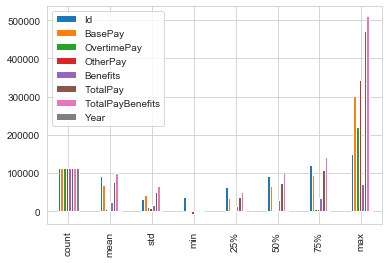

In [81]:
df1.describe().plot(kind='bar')
plt.show()

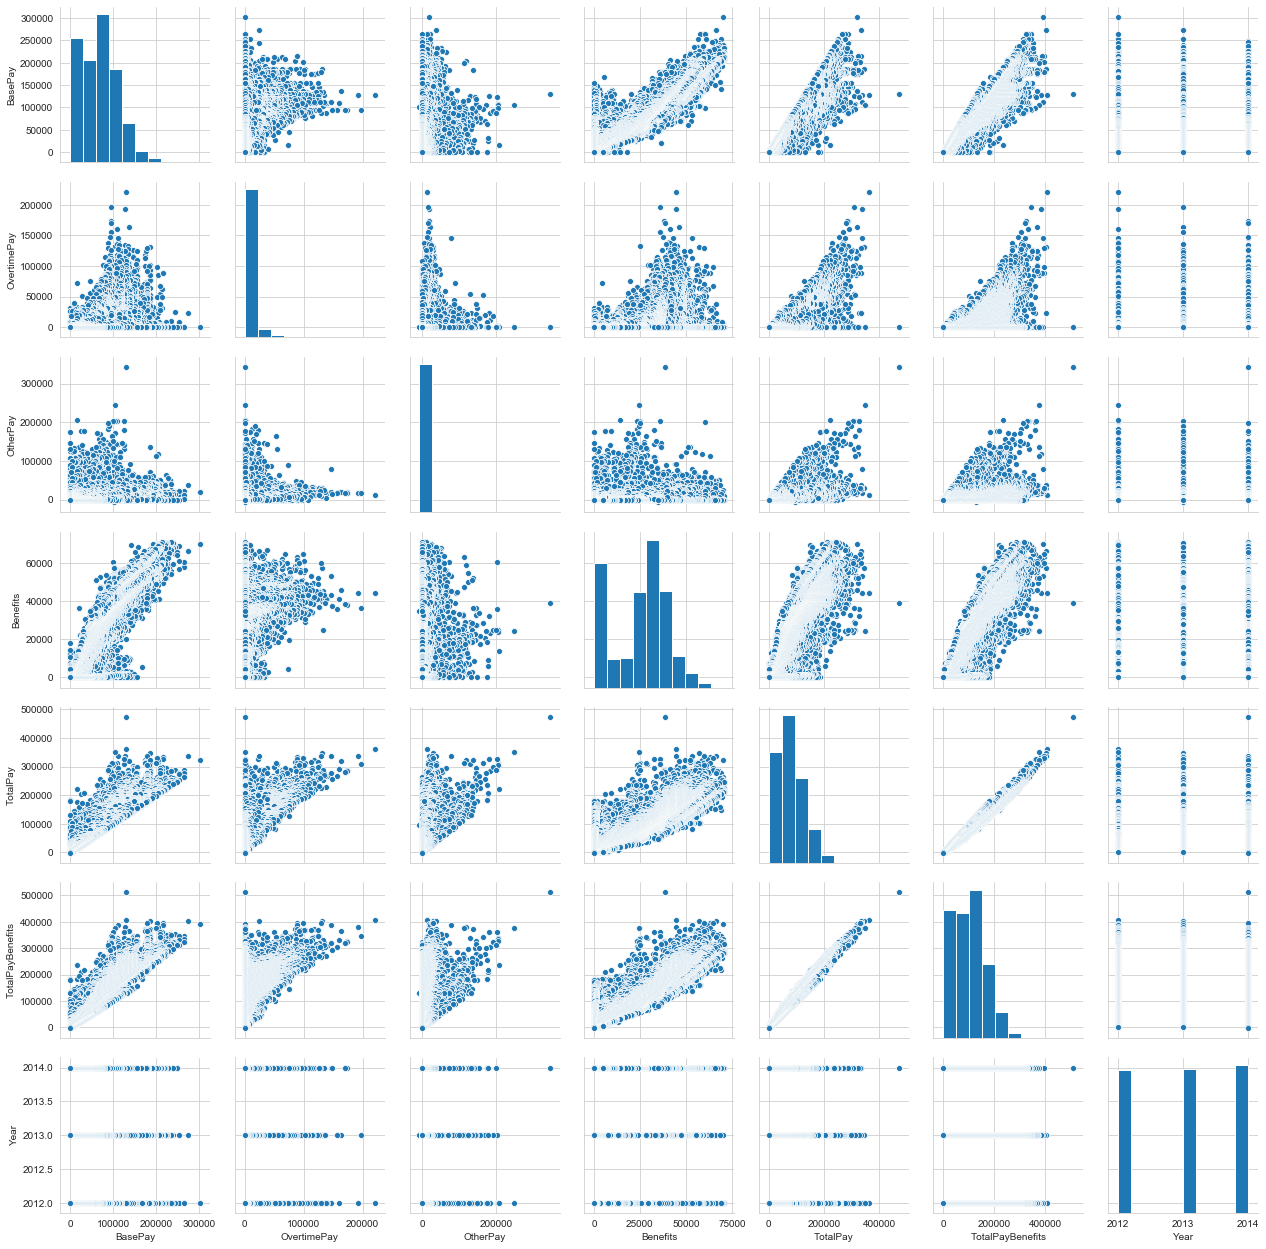

In [82]:
sns.pairplot(df1.iloc[:,1:])
plt.show()

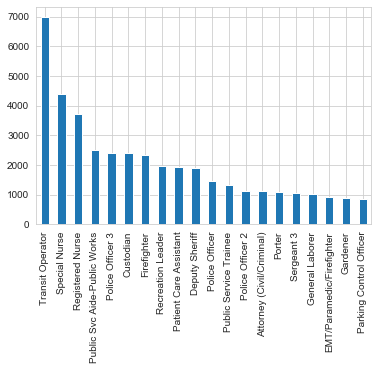

In [83]:
df1.JobTitle.value_counts().nlargest(20).plot(kind='bar')
plt.show()

- From the plot `Transit Operator`s are more.

### Bivariate Analysis

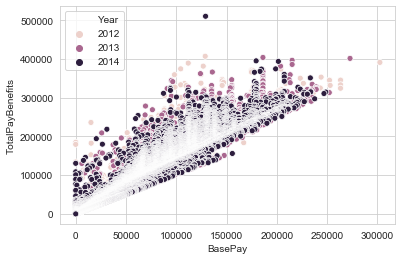

In [84]:
sns.scatterplot(x='BasePay',y='TotalPayBenefits',hue='Year',data=df1)
plt.show()

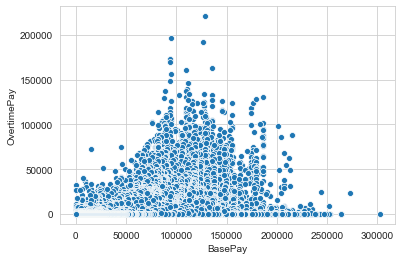

In [85]:
sns.scatterplot(x='BasePay',y='OvertimePay',data=df1)
plt.show()

In [86]:
grp = df1.groupby('Year')

In [ ]:
grp.aggregate(['max','mean','min'])

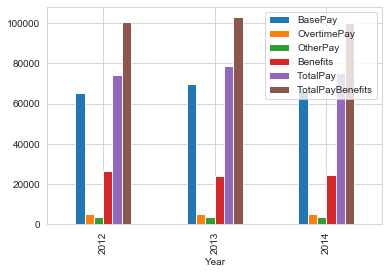

In [87]:
grp.mean().iloc[:,1:].plot(kind='bar')

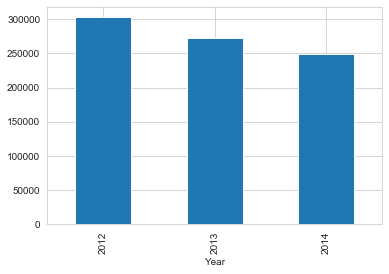

In [88]:
grp.max()['BasePay'].plot(kind='bar')
plt.show()

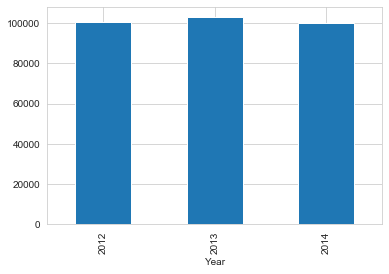

In [89]:
grp.mean()['TotalPayBenefits'].plot(kind='bar')
plt.show()

**Five most common jobs**

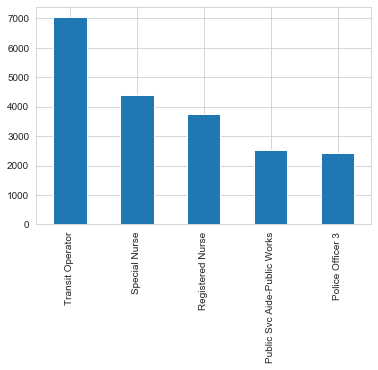

In [90]:
df.JobTitle.value_counts().head().plot(kind='bar')
plt.show()